# Data Exploration and Preparation


## Loading the Iris dataset and examining its structure
The reason for importing libraries will be explained when their methods are used.
First however, I import 'datasets' from the sci-kit learn library, which provides the Iris dataset.

I import matplotlib to plot the visualisations (histograms/scatter plots) and pandas to manipulate the dataset and preform data analysis.

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

To create the pandas dataframe (which makes working with the data easier) we used the pandas DataFrame() method. *iris.data* is the first argument, that being the matrix of values (length/width), the second argument *iris.feature_names* is the features.
The DataFrame() method creates a matrix where the columns are the feature names and the rows are the actual iris.data values.

In [ ]:
iris = datasets.load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


The data set appears to have four featues, *sepal length,sepal width, petal length and petal width*, all measured in centimeters.

Upon creating the dataframe notice that there isn't a feature stating the species, so for each row no species is specified.
However the iris dataset does contain an array of the species which appears to be for each row

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In order to append this features (and hence the correpsonding rows) a new feature can be created called 'type'. This will mean each row list the widths/lenghts and which flower type these belong to.

In [ ]:
df['type'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## summary statistics and visualizing the data
Summary statistics such as central tendency (mean, mode, median, quartiles) can be optained using the Pandas **describe()** method.
Using this method you can see the central tendency for both sepal and petal widths and lengths, also the 'type' is just the numbers 0,1,2 and are assigned to each row in a uniform order (0-49 is 0, 1 is 50-99, 100-149)

In [ ]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)        type  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


### Histogram
Creating a histogram can be done using the pandas **hist()** method, assiging 50 bins.

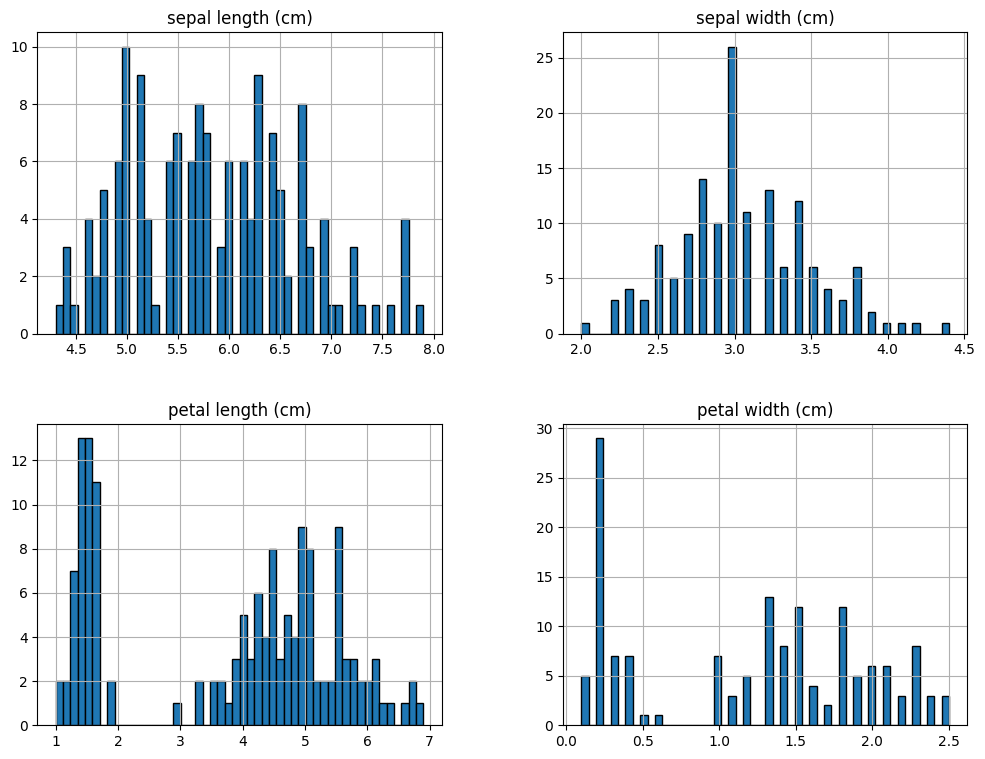

In [ ]:
df.iloc[:, 0:4].hist(bins=50, figsize=(12, 9), edgecolor='black')
plt.ticklabel_format(style='plain')
plt.show()

The following distributions can be seen
*   Sepal Length - Appears to be a normal distribution with a 'bimodal' shape, (peak on the left and a peak on the right)
*   Sepal width - Appears to follow a normal disribution but is slightly skewed right
*   Petal length - Bimodal distribution, two peaks that seems to belong to different clusters
*   Petal width - Bimodal distribution, two distributions that seem to belong to different clusters

### Scatter Plot


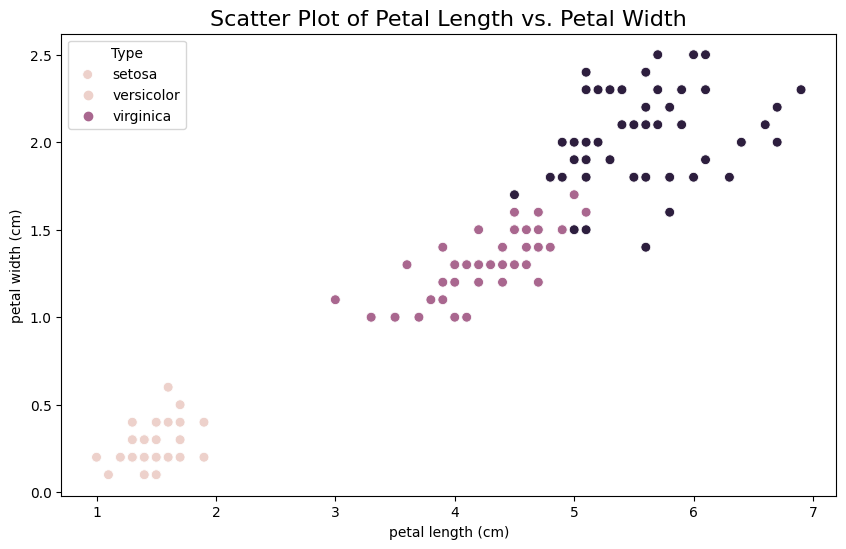

In [ ]:
key_legends = ['setosa', 'versicolor', 'virginica']

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'], hue=df['type'], s=50)
plt.title("Scatter Plot of Petal Length vs. Petal Width", fontsize=16)

l = plt.legend(title='Type', labels=key_legends)
for i, t in enumerate(l.get_texts()):
    t.set_text(key_legends[i])

plt.show()

## Spliting the dataset into training (80%) and testing sets (20%)
This can be done using the **train_test_split()** method provided by the sklearn.model_selection module
The method **train_test_split()** has the following arguments


*   **x** - The features, here is is the colums 0-3 of the dataframe (excluding type)
*   **y** - The labels, this is the 'type' featue of our dataframe
*   **test_size** - proportion of the dataset that should be reserved for testing, in this case 20% so 0.2
*   **random_state** - Controls how data is shuffled before the split. Can be set by number to use a seed value so shuffle can be reproduced when said number is used (deterministic)


In [ ]:
x = df.iloc[:, :-1].values   #features, iloc used to get all the rows and all the columns besides the final one (type)
y = df['type'].values   #Target variables

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 120
Testing set size: 30


The output values can be described as following
* **X_train** - Features to train
* **X_test** - Features to test
* **y_train** - Target values for X_train
* **y_test** - Target values for X_test

The model is trained using X_train and y_train in order to try learn the relationship between the features (X_train) and the target (y_train)

Model is tested using x_test, the predictions the model makes (outputs) using x_test is compared to the actual values in y_test to evaluate the models skill





# Decision Tree Implementation


The decision tree can be implemented using the **DecisionTreeClassifier()** method provided by the sklearn.tree. This method creates an instance of the decision tree. I call my decision tree 'dtc'

Training the decision tree on the training data (x_train and y_train) is as simple as providing them as arguments to the **fit()** method.

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

## Setting and tuning hyperparameters
In order to tune the parameters of the decision tree such as the depth, width and the number of nodes we can use the  **GridSearchCV()** method that comes with sklearn.model_selection.

GridSearchCV() provides "cross validation" meaning if runs and tests the performance of each hyperparameter combunation possible. The parameters are


1.   **DecisionTreeClassifier** - The decision tree to tune

2.   **param_grid** - Contains the name of each hyperparameter and the values to try out for each hyperparameter. I set the following parameters to test
*   **max_depth** - Possible depth of decison tree
*   **min_samples_leaf** - miminumm number of samples (rows) that must exist for a node to exist
*   **min_samples_split** -  miminumm number of samples (rows) that must exist for a node to have two children nodes

3.   **cv** - Cross validation is a technique in which the data is split into "folds", then iteratively one fold is used for testing and the rest are used for training, this is used to set the number of folds. I set it to 5 to train on 4 sections of data and test against 1.






In [ ]:
param_grid = {
    'max_depth': [3,4,5,6,7],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 5, 10, 20]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5) #Create GridSearchCV instance with parameters
grid_search.fit(X_train, y_train) #add training data to grid search
best_parameters = grid_search.best_params_ #return combination of hyperparameters with best performance during cross-validation
print(best_parameters)

{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}


Upon running the code above you should see the best combination of hyperparameters printed to the screen, when I ran it I got...

`{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}`

In [ ]:
dtc = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=2)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3)

# Model Evaluation

In [ ]:
# Make predictions on test data, to be compared to y_test
prediction = grid_search.predict(X_test)
print(prediction)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


* **Accuracy** - Portion of the dataset instances identified as being positive (regardless if they actually are)
* **Precision** - How many of the positvely identifed instances in the dataset are actually postive (true positives), not false postives
* **Recall** - How good was the model at actually identifying true positives
* **F1** - The Harmonic mean of precision and recall

Luckily the sklearn.metrics library contains the following methods **accuracy_score()** and **classification_report()** to calculate all of these.


*   **accuracy_score()** - compares the y_test values to the predicted values
*   **classification_report()** - Builds a classification report of the main classification metrics (precision, recall, F1, spport).

The classification_report() method takes in actual dataset values to test *y_test*, the values the model predicted *prediction* and the labels, so what is the prediction value actually predicting? In this case either setosa, versicolor or virginica







In [ ]:
#Accuracy
accuracy = accuracy_score(y_test, prediction)

class_report = classification_report(y_test, prediction, target_names=['setosa', 'versicolor', 'virginica'])

print('Accuracy', accuracy)
print(class_report)

Accuracy 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



The output shows the accuracy and the class report.

The *support* column states the number of occurances of a class in the dataset.
It appears...
* **accuracy** - 1.0 meaning all the prediced instances classes were the correct class
* **precision** - is 1.0 meaning every instance predictd as positive truly is positive, no false positives
* **recall** - 1.0 meaning model identified all positive instances, no false negatives
* **f1** - 1.0 meaning perfect balance between precision and recall



# Visualization
The decision tree canbe visualised using the **plot_tree()** method provided by the sklearn.tree library.

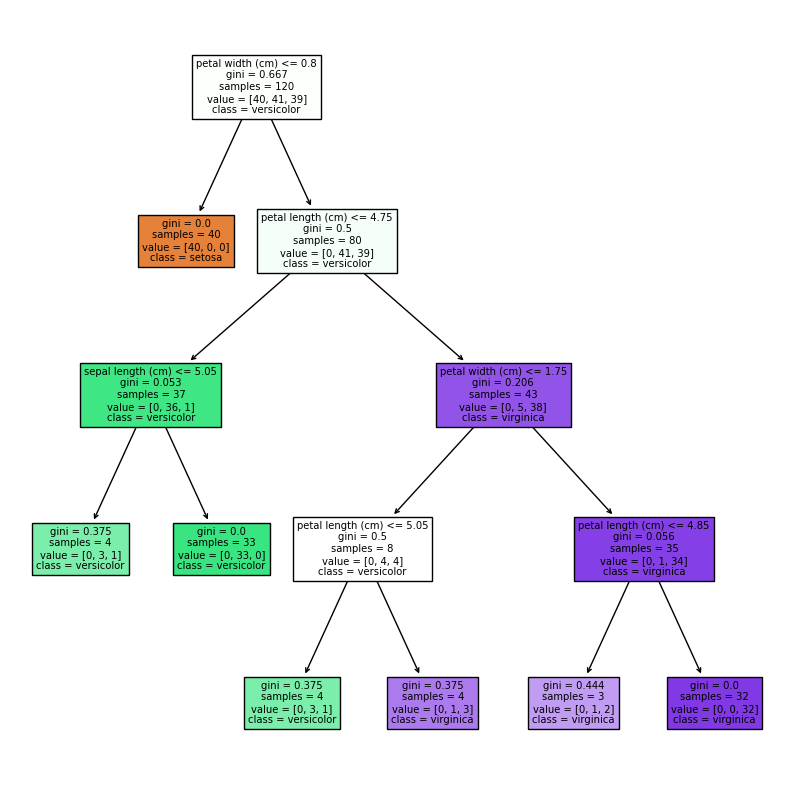

In [ ]:
def decision_tree():
  fig = plt.figure(figsize=(10,10))
  plot_tree(dtc, filled=True, feature_names= iris.feature_names, class_names=iris.target_names)
  plt.show()
decision_tree()

Above is the decision tree, each node has the values

* **Feature** - This is one of the 4 features, this is the instance feature being decided upon to make a prediction. The feature changes with each node meaning at each stage different features are taken into account to make a prediction.
* **Gini** - probability of a particular instance (row in dataset) being wrongly classified when it is randomly chosen, ranges between 0 (all instances belong to single class) and 1(all instances belong to mix of classes)
* **samples** - How many instances from the dataset have reached that node
* **value** - distribution of samples that reach the node, for this decision tree it appears to be [Setosa, Versicolor, Virginica]
* **class** - Class determined the most samples in that node

The decision tree makes decision as follows
1. **Root Node** If a petal width is less than or equal to 0.8 the instances will move down the the left node, being classified as a setosa, else they will move down right.

2. **Second Level** The leftmost node, with 40 samples, are all the instances classified as Setosa.  For the rightmost node, if the petal length is less than or equal to 4.75 the samples move to the left child, else move to the right child

3. **Third level**
*   **left node** - If the sepal length is less than or equal to 5.05 go down left, else go down right, the predominant class is versicolor for both children nodes hence all samples will be categorized as versicolor
*   **right node**- If petal width is less than or equal to 1.75 cm, the samples are categorized as versicolor, else they are categorized as virginica

4. **Fourth Level**
* The two leftmost nodes are leaf nodes, all samples ending up here are categorized as 'versicolor'
* For the leftmost none leaf node, if the petal length is less than or equal to 5.05 go down left (is a versicolor) else go down right (is a virginica)
* For the rightmost none leaf node, if the petal length is less than or equal to 4.85 go down left else go down right, both classified as virginica.

5. **Fifth Level**
* This level is comprised of leaf nodes only, hence all samples ending up here will be categorized to a species
* The left most node is the only versicolor, the rest a virginica






# Discussion and Conclusion
In this section I will summarize my key findings from each section


1.   **Data Exploration and Preperation**

* The dataset was the 'iris' dataset, which is made of up 150 samples of iris flowers, of the 150 flower samples they are divided uniformly into classes, species in this case being setosa, versicolor, and virginica, with 50 samples of each (making 150).
* There a four features in the dataset to describe the flower sepal length, sepal width, petal length, and petal width
* Scatter plot visulisation showed there was a clear distinction in feature values for each class, they could be clearly labelled based on their features.
* The dataset was split into training and testing sets, 80% of the data for training (used to create the model), 20% for testing (model predictions will be compared to these)


2.   **Decision Tree Implementation**
* The sci-kit learn library provides methods such as **DecisionTreeClassifier()** to create decision trees
* Tuning hyperparamters decision parameters makes the model suitable for the data, ensuring it is not too rigid or flexible, this can be done using the **GridSearchCV()** method

3.   **Model Evaluation**
* The performance (skill) of the model was measured by comparing the set aside testing data (20% of the original dataset) to predictions my model made
* My model performed perfectly, predicting the correct classes (flower species) for each test set instance
* Metrics to measure performance such as Accuracy, Precision, Recall and F1-Score all evaluated to 1.0
4.   **Visualization**
* Visualizing the decision tree gives us insight how the model made its decision to classify each sample
* I described each decision that could be made based on some feature description and how it would determine to what class an instance belong to


In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
!jupyter nbconvert --to pdf /content/Assignment2.ipynb

[NbConvertApp] Converting notebook /content/Assignment2.ipynb to pdf
[NbConvertApp] Support files will be in Assignment2_files/
[NbConvertApp] Making directory ./Assignment2_files
[NbConvertApp] Making directory ./Assignment2_files
[NbConvertApp] Making directory ./Assignment2_files
[NbConvertApp] Writing 51926 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 237338 bytes to /content/Assignment2.pdf
